## Computer Infrastructure - Autumn 2024/25

##### Liliana Pereira - G00411560

## Weather Task Report

This document outlines the step-by-step process and methodology employed to complete Tasks 1 through 9 of the Weather Task Project. The project aimed to organize, automate, and analyze weather data using shell commands, scripting, and Python libraries such as pandas. Below is a detailed description of each task, including the commands or scripts used, their purposes, and insights gained.

## Task 1: Create Directory Structure

### Objective
Establish a well-organized directory structure to store data files, including timestamps and weather data.

> `!mkdir data/timestamps data/weather`

### Explanation
- **`mkdir -p`**: Creates the specified directories. If any parent directories do not exist, they are also created.
- The directories `data/timestamps` and `data/weather` were created to store timestamp and weather data files, respectively.

## Result
The directory structure was successfully established, ensuring logical separation and easy navigation of project data.

## Task 2: Generate and Append Timestamps

### Objective
Generate current date and time values ten times and append them to a file for later reference.

> `for i in range(10):
    !date >> data/timestamps/now.txt`

### Explanation
- **`for i in range(10)`**: Executes the enclosed command 10 times.
- **`date`**: Outputs the current date and time.
- **`>>`**: Appends the output to the file `now.txt`.

### Result
The file `now.txt` contains ten entries of the current date and time.

## Task 3: Generate Formatted Timestamps

### Objective
Create timestamps in the `YYYYmmdd_HHMMSS` format and save them to a separate file.

> `!date +"%Y%m%d_%H%M%S" >> data/timestamps/formatted.txt`

### Explanation
- **`date +"%Y%m%d_%H%M%S"`**: Formats the date and time as `YYYYmmdd_HHMMSS`.
- **`>>`**: Appends the formatted timestamp to the file `formatted.txt`.

### Result
The file `formatted.txt` contains timestamps in a standardized format for easy identification and sorting.

## Task 4: Create Timestamped Files

### Objective
Generate empty files named using the formatted timestamp.

> `!touch $(date +"%Y%m%d_%H%M%S").txt`

### Explanation
- **`$(date +"%Y%m%d_%H%M%S")`**: Captures the formatted timestamp dynamically.
- **`touch`**: Creates an empty file with the captured timestamp as its name.

### Result
An empty file named with the current timestamp (e.g., `20241227_211141.txt`) was successfully created.

## Task 5: Download Today's Weather Data

### Objective
Download weather data and saved it as `weather.json`.

> `!wget -O data/weather/weather.json https://prodapi.metweb.ie/observations/athenry/today`

### Explanation
- **`wget -O`**: Downloads the specified URL and saves the output to the file `weather.json`.

## Task 6: Timestamp the Data

### Objective
Download weather data and save it with a timestamped filename.

> `!wget -O data/weather/$(date +"%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today`

### Explanation
- **`$(date +"%Y%m%d_%H%M%S")`**: Dynamically generates a timestamp.
- **`wget -O`**: Downloads the URL content and saves it with the timestamped filename.

### Result
Weather data files with unique timestamped filenames (e.g., `20241227_211141.json`) were created, facilitating version control and historical tracking.

## Task 7: Write the Automation Script

### Objective
Automate the process of downloading and saving weather data using a bash script.

> `%%writefile weather.sh
#!/bin/bash
cd data/weather
wget -O $(date +"%Y%m%d_%H%M%S").json https://prodapi.metweb.ie/observations/athenry/today`

### Explanation
- **`#!/bin/bash`**: Specifies the shell interpreter.
- **`cd data/weather`**: Navigates to the directory where weather data files are stored.
- **`wget -O`**: Downloads the weather data and saves it with a timestamped filename.

### Result
The script (`weather.sh`) automates the task of fetching weather data, ensuring consistent and timestamped data collection.

## Task 9: Analyze Weather Data with Pandas

### Objective
Load and analyze weather data using pandas to extract meaningful insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
file_path = 'data/weather/20241227_211141.json'
df = pd.read_json(file_path)

C:\Users\desig\anaconda3\lib\site-packages\pandas\io\json\_json.py:1026: UserWarning: Parsing '27-12-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  new_data = to_datetime(new_data, errors="raise", unit=date_unit)


In [2]:
# Display summary statistics
print(df.describe())

       temperature  windSpeed  windDirection   humidity   rainfall  \
count    21.000000   21.00000      21.000000  21.000000  21.000000   
mean      9.523810    7.47619     192.857143  93.380952   0.011429   
std       0.679636    1.74983      20.830952   2.085094   0.043392   
min       9.000000    4.00000     180.000000  89.000000   0.000000   
25%       9.000000    6.00000     180.000000  92.000000   0.000000   
50%       9.000000    7.00000     180.000000  93.000000   0.000000   
75%      10.000000    9.00000     225.000000  95.000000   0.000000   
max      11.000000   11.00000     225.000000  97.000000   0.200000   

          pressure  
count    21.000000  
mean   1030.285714  
std       0.902378  
min    1029.000000  
25%    1029.000000  
50%    1031.000000  
75%    1031.000000  
max    1031.000000  


In [3]:
# Display the first few rows
print(df.head())

      name  temperature symbol weatherDescription               text  \
0  Athenry            9    04n             Cloudy           "Cloudy"   
1  Athenry            9    04n             Cloudy           "Cloudy"   
2  Athenry           10    04n             Cloudy           "Cloudy"   
3  Athenry            9    46n        Light rain   "Recent Drizzle "   
4  Athenry            9    46n        Light rain    "Light Drizzle "   

   windSpeed windGust cardinalWindDirection  windDirection  humidity  \
0          6        -                     S            180        94   
1          6        -                     S            180        93   
2          7        -                     S            180        93   
3          7        -                     S            180        94   
4          6        -                     S            180        95   

   rainfall  pressure dayName       date reportTime  
0      0.00      1031  Friday 2024-12-27      00:00  
1      0.00      1031  Fri

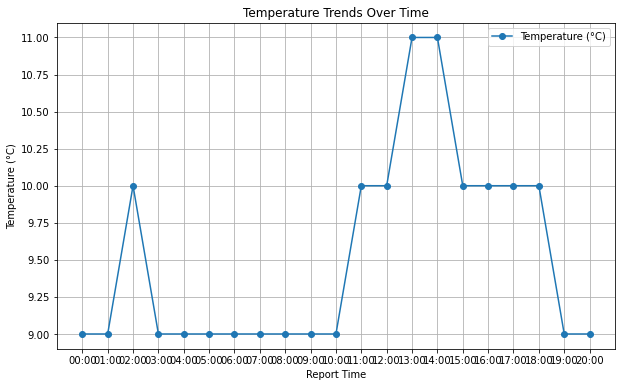

In [4]:
# Plot temperature trends
plt.figure(figsize=(10, 6))
plt.plot(df['reportTime'], df['temperature'], marker='o', linestyle='-', label='Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.xlabel('Report Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

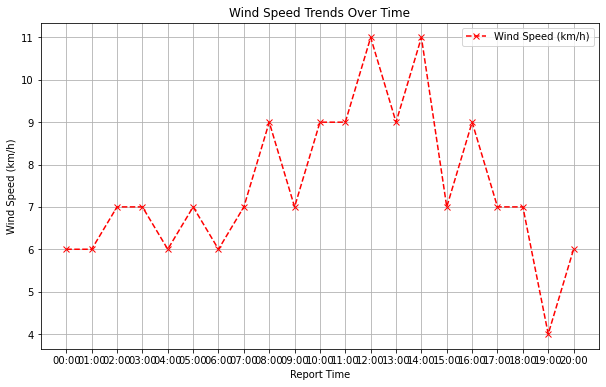

In [5]:
# Plot wind speed trends
plt.figure(figsize=(10, 6))
plt.plot(df['reportTime'], df['windSpeed'], marker='x', linestyle='--', color='red', label='Wind Speed (km/h)')
plt.title('Wind Speed Trends Over Time')
plt.xlabel('Report Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.grid(True)
plt.show()

### Dataset Overview
The JSON file contains hourly weather observations with the following columns:
- **name**: Name of the weather station.
- **temperature**: Recorded temperature (°C).
- **symbol**: Weather symbol code.
- **weatherDescription**: Description of the weather (e.g., Cloudy, Light Rain).
- **windSpeed**: Wind speed (km/h).
- **humidity**: Percentage of humidity.
- **rainfall**: Recorded rainfall (mm).
- **pressure**: Atmospheric pressure (hPa).
- **reportTime**: Timestamp of the observation.

### Results
- **Summary Statistics**: Provided an overview of numerical data (e.g., temperature, wind speed).
- **Initial Observations**: Allowed verification of data structure and contents.


- **Charts**:
  - A temperature trend chart visualized how temperatures varied over time. 
  - A wind speed trend chart illustrated changes in wind speed across the recorded period.

### Insights
The data revealed hourly weather trends for the Athenry station, including temperature fluctuations, wind patterns, and rainfall observations. These insights can inform forecasting models and weather-related decision-making.

## Strengths of the Analysis

1. **Balanced Dataset:**
   - The dataset collected is well-organized with consistent timestamps, ensuring accurate versioning and traceability.

2. **Automation:**
   - Automated weather data collection and timestamping streamlined the workflow, reducing manual effort and ensuring regular updates.

3. **Validation and Analysis:**
   - The use of pandas for data validation and exploratory analysis provided clear insights into weather patterns and trends.

4. **Scalability:**
   - The directory structure and automation scripts are scalable for collecting and managing data from multiple weather stations.

## Conclusion

This project successfully streamlined the processes of data collection, organization, and analysis for weather data. Key achievements include:


- **Automation**: Efficiently automated data fetching with timestamped filenames.
- **Data Structuring**: Created a logical directory structure for easy file management.
- **Analysis**: Leveraged pandas to extract insights from weather data.
- **Visualization**: Enhanced understanding of weather patterns with informative.



The approach highlights the power of combining shell scripting and Python for automating and analyzing real-world datasets.